In [12]:
import pandas as pd
import json

def create_dataframe(annotations_path):
    with open(annotations_path, 'r') as file:
        data = json.load(file)

    images = pd.DataFrame(data['images']).rename(columns={'id': 'image_id'})[['image_id', 'file_name', 'width', 'height']]

    categories = pd.DataFrame(data['categories'])[['id', 'name']]
    categories.rename(columns={'id': 'category_id'}, inplace=True)

    usecols = ['image_id', 'category_id']
    annotations = pd.DataFrame(data['annotations'])[usecols]

    dataframe = annotations.merge(categories, on='category_id').merge(images, on='image_id')[['file_name', 'name']]
    
    return dataframe

In [13]:
annotation_train_path = '/home/daviddu/Documents/hw2/food_dataset/raw_data/public_training_set_release_2.0/annotations.json'
annotation_val_path = '/home/daviddu/Documents/hw2/food_dataset/raw_data/public_validation_set_2.0/annotations.json'
annotation_test_path = '/home/daviddu/Documents/hw2/food_dataset/raw_data/public_test_set_release_2.0/annotations.json'


image_train_path = '/home/daviddu/Documents/hw2/food_dataset/raw_data/public_training_set_release_2.0/images'
image_val_path = '/home/daviddu/Documents/hw2/food_dataset/raw_data/public_validation_set_2.0/images'
image_test_path = '/home/daviddu/Documents/hw2/food_dataset/raw_data/public_test_release_2.0'

In [14]:
train_df = create_dataframe(annotation_train_path).drop_duplicates().reset_index(drop=True)
val_df = create_dataframe(annotation_val_path).drop_duplicates().reset_index(drop=True)


In [15]:
train_df['file_name'] = train_df['file_name'].apply(lambda x: image_train_path + '/' + x)
val_df['file_name'] = val_df['file_name'].apply(lambda x: image_val_path + '/' + x)

In [16]:
unique = train_df['name'].unique()
name_to_int = {name: idx for idx, name in enumerate(unique)}
int_to_name = {idx: name for idx, name in enumerate(unique)}
train_df['label'] = train_df['name'].apply(lambda x: name_to_int[x])
val_df['label'] = val_df['name'].apply(lambda x: name_to_int[x])

In [17]:
#save to csv
import os
os.makedirs('processed_csv', exist_ok=True)

train_df.to_csv('processed_csv/train.csv', index=False)
val_df.to_csv('processed_csv/val.csv', index=False)

In [18]:
from dataset import FoodDataset

train_dataset = FoodDataset(train_df)
val_dataset = FoodDataset(val_df)

50


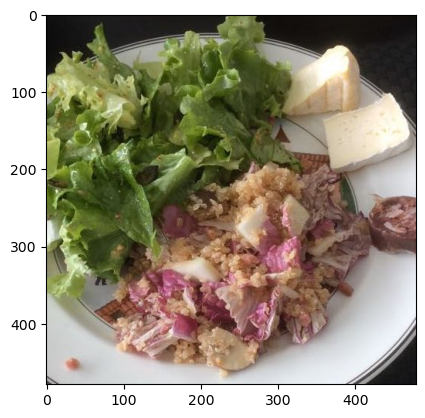

In [19]:
import matplotlib.pyplot as plt
import numpy as np
image, label = train_dataset[113]
plt.imshow(image)
print(label)

In [20]:
print(train_df.iloc[1000])

file_name    /home/daviddu/Documents/hw2/food_dataset/raw_d...
name                                                   ham-raw
label                                                        1
Name: 1000, dtype: object


In [21]:
import pickle as pkl

with open('processed_csv/label_to_food.pkl', 'wb') as file:
    pkl.dump(int_to_name, file)

In [22]:
int_to_name

{0: 'soft-cheese',
 1: 'ham-raw',
 2: 'hard-cheese',
 3: 'bread-wholemeal',
 4: 'cottage-cheese',
 5: 'bread-half-white',
 6: 'fruit-salad',
 7: 'pancakes',
 8: 'salmon-smoked',
 9: 'avocado',
 10: 'spring-onion-scallion',
 11: 'emmental-cheese',
 12: 'cucumber',
 13: 'egg',
 14: 'bread-whole-wheat',
 15: 'butter',
 16: 'jam',
 17: 'bread',
 18: 'bread-white',
 19: 'caprese-salad-tomato-mozzarella',
 20: 'green-olives',
 21: 'tete-de-moine',
 22: 'salami',
 23: 'semi-hard-cheese',
 24: 'fresh-cheese',
 25: 'salad-leaf-salad-green',
 26: 'gruyere',
 27: 'coffee-with-caffeine',
 28: 'honey',
 29: 'bread-nut',
 30: 'blue-mould-cheese',
 31: 'cauliflower',
 32: 'bell-pepper-red-raw',
 33: 'walnut',
 34: 'sun-dried-tomatoe',
 35: 'red-cabbage',
 36: 'leaf-spinach',
 37: 'artichoke',
 38: 'mixed-vegetables',
 39: 'mashed-potatoes-prepared-with-full-fat-milk-with-butter',
 40: 'dried-meat',
 41: 'meat-terrine-pate',
 42: 'pecan-nut',
 43: 'apricot-dried',
 44: 'ham-cooked',
 45: 'cucumber-pic

In [1]:
from torchvision import datasets, transforms


train_dataset = datasets.ImageFolder(root="/home/daviddu/CS130/backend/food_id_model/datasets/food-classification"+ '/train')

class_to_idx = train_dataset.class_to_idx


idx_to_class = {idx: class_name for class_name, idx in class_to_idx.items()}





In [4]:
import pickle as pkl
with open('idx_to_food.pkl', 'wb') as file:
    pkl.dump(idx_to_class, file)